# Problem of predicting Salary based on given data

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

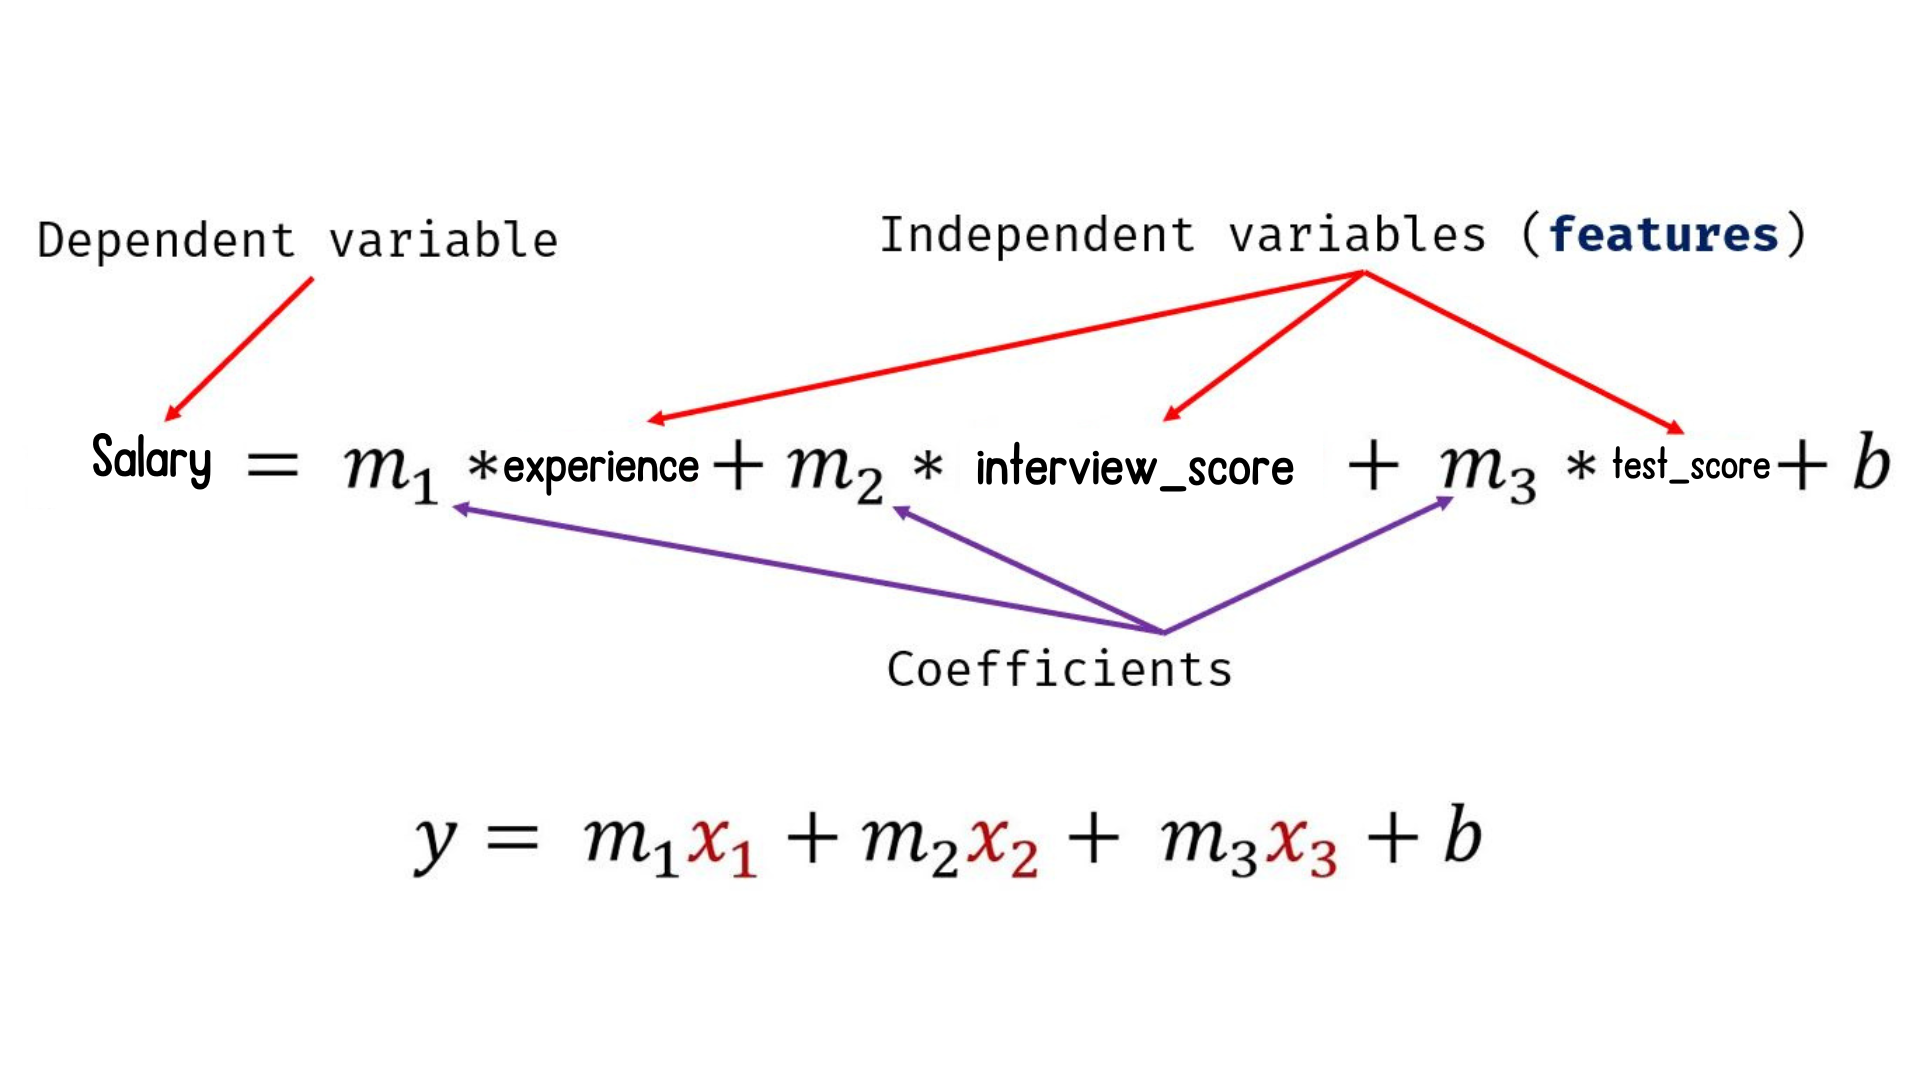

In [30]:
from IPython.display import Image

# Load the image
image = Image(filename="/content/multi variable equation.png")

# Display the image in the text cell
display(image)

In [31]:
df = pd.read_csv("/content/hiring.csv")
df

,experience,interview_score(out of 10),test_score(out of 10),salary($)
0,NaN,9,8.0,50000
1,NaN,6,8.0,45000
2,five,7,6.0,60000
3,two,10,10.0,65000
4,seven,6,9.0,70000
5,three,10,7.0,62000
6,ten,7,NaN,72000
7,eleven,8,7.0,80000


In [32]:
# @title DataProcessing
df.isna().sum()

experience                    2
interview_score(out of 10)    0
test_score(out of 10)         1
salary($)                     0
dtype: int64

In [33]:
# @title Convert word to decimal
word2num = {"one": 1,
            "two":2,
            "three":3,
            "four":4,
            "five":5,
            "six":6,
            "seven":7,
            "eight":8,
            "nine":9,
            "ten":10,
            "eleven": 11,
            "zero":0} # as per the data requirement
df['experience'].fillna("zero", inplace=True)
df['experience'] = df['experience'].map(word2num)
df

,experience,interview_score(out of 10),test_score(out of 10),salary($)
0,0,9,8.0,50000
1,0,6,8.0,45000
2,5,7,6.0,60000
3,2,10,10.0,65000
4,7,6,9.0,70000
5,3,10,7.0,62000
6,10,7,NaN,72000
7,11,8,7.0,80000


In [35]:
# @title fill nan test_score with median value
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)
df

,experience,interview_score(out of 10),test_score(out of 10),salary($)
0,0,9,8.0,50000
1,0,6,8.0,45000
2,5,7,6.0,60000
3,2,10,10.0,65000
4,7,6,9.0,70000
5,3,10,7.0,62000
6,10,7,8.0,72000
7,11,8,7.0,80000


In [36]:
y = df['salary($)']
X = df.drop(['salary($)'], axis=1)

In [37]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

### Predict Salary of 12 years of experience ,10 out of 10 interview score, 10 out of 10 test score

In [38]:
clf.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

### Predict Salary of 2 years of experience ,9 out of 10 interview score, 6 out of 10 test score

In [39]:
clf.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54284.5705968])

### Model equation after training

In [46]:
clf.coef_

array([2812.95487627, 2205.24017467, 1845.70596798])

In [47]:
clf.intercept_

17737.263464337695

In [49]:
# @title Salary of 2 years of experience ,9 out of 10 interview score, 6 out of 10 test score
clf.coef_[0]*2+clf.coef_[1]*9+clf.coef_[2]*6+clf.intercept_

54284.57059679766

In [50]:
# @title Salary of 12 years of experience ,10 out of 10 interview score, 10 out of 10 test score
clf.coef_[0]*12+clf.coef_[1]*10+clf.coef_[2]*10+clf.intercept_

92002.18340611355